## Initialization

In [1]:
%%capture
# give permissions to kaggle API
! pip install kaggle
! mkdir /root/.kaggle
! cp kaggle.json /root/.kaggle
! chmod 600 /root/.kaggle/kaggle.json

In [2]:
%%capture
# download dataset from kaggle to colab
! kaggle datasets download -d rayonegautam/charanet

# extract the content of the zipped file
!unzip /content/charanet.zip -d /content/

In [3]:
# remove uncessary files
! rm -r /content/charanet.zip
! rm -r /content/kaggle.json
! rm -r /content/sample_data

## Modules & Libraries

In [4]:
import os
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import soundfile as sf

In [5]:
dataset_path = '/content/charaNet'
subfolders = os.listdir(dataset_path)

### Data Augmentation

In [ ]:
def plotSignals(signal, white_noise_signal,
                time_stretched_signal,
                pitch_scaled_signal,
                plority_inverted_signal,
                random_gain_signal,
                sr):

  fig, ax = plt.subplots(nrows=6, figsize=(12, 15))

  librosa.display.waveshow(signal, sr=sr, ax=ax[0])
  ax[0].set_title("Original signal")

  librosa.display.waveshow(white_noise_signal, sr=sr, ax=ax[1])
  ax[1].set_title("Signal with white noise")

  librosa.display.waveshow(time_stretched_signal, sr=sr, ax=ax[2])
  ax[2].set_title("Time stretched signal")

  librosa.display.waveshow(pitch_scaled_signal, sr=sr, ax=ax[3])
  ax[3].set_title("Pitch scaled signal")

  librosa.display.waveshow(plority_inverted_signal, sr=sr, ax=ax[4])
  ax[4].set_title("Polarity Inverted Signal")

  librosa.display.waveshow(random_gain_signal, sr=sr, ax=ax[5])
  ax[5].set_title("Signal with random gain")


  plt.tight_layout()
  plt.show()

**White Noise**

In [ ]:
def addWhiteNoise(signal, noise_factor):
  noise = np.random.normal(0, signal.std(), signal.size)
  augmented_signal = signal + noise * noise_factor

  return augmented_signal

**Time Stretch**

In [ ]:
def addTimeStretch(signal, stretch_rate):
  return librosa.effects.time_stretch(signal, rate=stretch_rate)

**Pitch Scale**

In [ ]:
def pitchScale(signal, sr, num_semitones):
    return librosa.effects.pitch_shift(y=signal, sr=sr, n_steps=num_semitones)

**Polarity Inversion**

In [ ]:
def invertPolarity(signal):
  return signal * -1

**Random Gain**

In [ ]:
def randomGain(signal, min_gain_factor, max_gain_factor):
  gain_factor = np.random.uniform(min_gain_factor, max_gain_factor)
  return signal * gain_factor

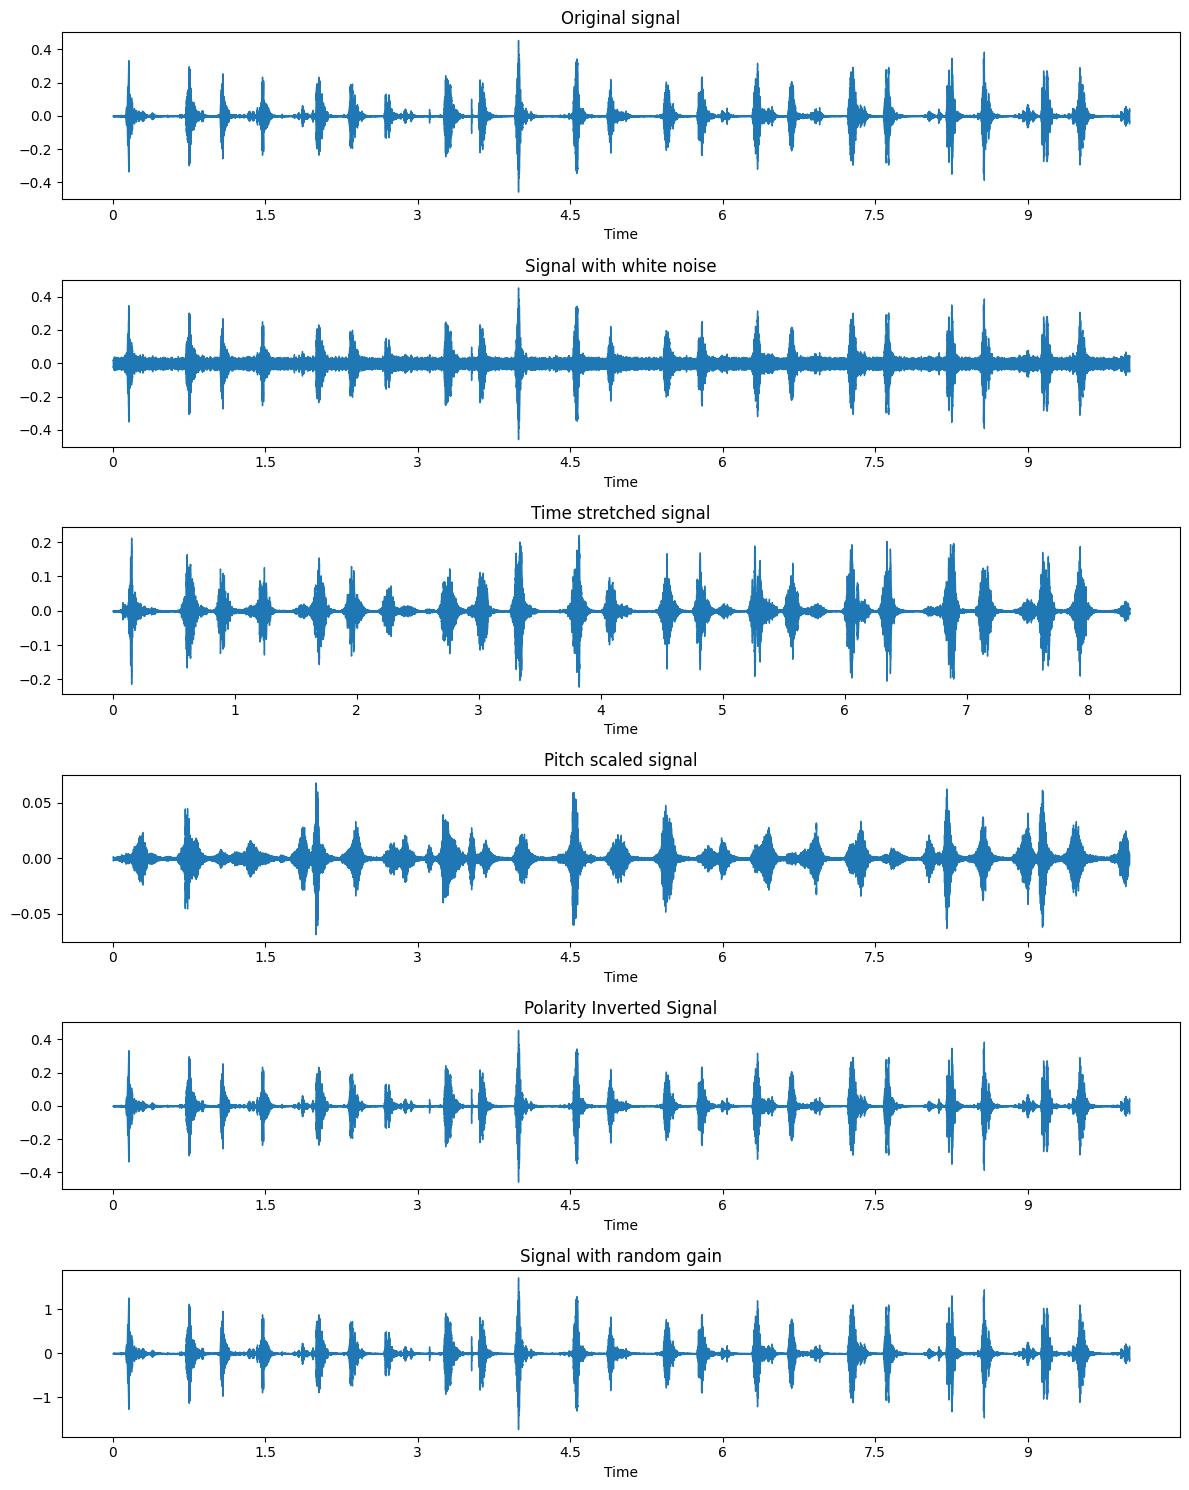

In [ ]:
file_path = "/content/charaNet/train/Himalayan Monal/XC114356 1.mp3"

signal, sr = librosa.load(file_path)

white_noise_signal = addWhiteNoise(signal, 0.3)
sf.write("white_noise_signal.wav", white_noise_signal, sr)

time_stretched_signal = addTimeStretch(signal, 1.2)
sf.write("time_stretched_signal.wav", time_stretched_signal, sr)

pitch_scaled_signal = pitchScale(signal, sr, 30)
sf.write("pitch_scaled_signal.wav", pitch_scaled_signal, sr)

polarity_inverted_signal = invertPolarity(signal)
sf.write("polarity_inverted_signal.wav", polarity_inverted_signal, sr)

random_gain_signal = randomGain(signal, 3, 8)
sf.write("random_gain_signal.wav", random_gain_signal, sr)

plotSignals(signal,
            white_noise_signal,
            time_stretched_signal,
            pitch_scaled_signal,
            polarity_inverted_signal,
            random_gain_signal, sr)